# mpra_analyze_H9D0

Margaret Guo

12/10/2020

In [3]:
library(MPRAnalyze)
library(tidyverse)
library(pheatmap)
# library(mpra)
# library(QuASAR)
# library(BiocParallel)
# library(stringr)
# library(reshape2)
# library(ggplot2)
# library(gridExtra)
# library(VennDiagram)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.4
✔ tidyr   1.0.0     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [4]:
getwd()

[1] "/Users/mguo123/Google Drive/1_khavari/noncancer_project/miseq/novogene_071420"

In [5]:
# list.files(getwd())

In [6]:
count_rna = read.csv('dedup_counts/count_matrix.csv',row.names=1)
head(count_rna)

,AST_1_L1,AST_1_L2,AST_2_L1,AST_2_L2,H4_D4_1_L1,H4_D4_1_L2,H9_D0_1A_L1,H9_D0_1A_L2,H9_D0_1B_L1,H9_D0_1B_L2,⋯,SL_1_L1,SL_1_L2,SL_2_L1,SL_2_L2,SL_3A_L1,SL_3A_L2,SL_3B_L1,SL_3B_L2,SL_4_L1,SL_4_L2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr5.109076112.Ref.C.3,151,138,97,72,141,143,22,17,30,33,⋯,43,40,88,61,40,32,33,28,61,55
chr10.62185494.Ref.C.7,60,52,61,50,42,41,17,19,11,9,⋯,39,33,21,25,23,13,31,32,34,36
chr2.74455472.all_alt.T.6,529,428,104,89,332,314,119,115,106,101,⋯,193,149,163,164,107,77,131,110,232,210
chr6.27799470.all_alt.G.9,404,377,180,159,236,207,74,76,52,45,⋯,88,79,96,87,59,37,82,67,88,90
chr11.47270255.all_alt.T.8,76,76,54,41,62,49,21,17,13,8,⋯,25,23,34,34,42,39,37,38,21,19
chr10.107594646.Ref.G.10,306,276,48,52,186,181,30,26,23,26,⋯,65,57,91,82,57,53,12,9,82,84


In [7]:
colnames(count_rna)

[1] "AST_1_L1"    "AST_1_L2"    "AST_2_L1"    "AST_2_L2"    "H4_D4_1_L1" 
 [6] "H4_D4_1_L2"  "H9_D0_1A_L1" "H9_D0_1A_L2" "H9_D0_1B_L1" "H9_D0_1B_L2"
[11] "H9_D0_2_L1"  "H9_D0_2_L2"  "H9_D10_1_L1" "H9_D10_1_L2" "H9_D10_2_L1"
[16] "H9_D10_2_L2" "H9_D10_3_L1" "H9_D10_3_L2" "H9_D10_4_L1" "H9_D10_4_L2"
[21] "H9_D2_1_L1"  "H9_D2_1_L2"  "H9_D2_2_L1"  "H9_D2_2_L2"  "H9_D2_3_L1" 
[26] "H9_D2_3_L2"  "H9_D2_4_L1"  "H9_D2_4_L2"  "H9_D4_2_L1"  "H9_D4_2_L2" 
[31] "H9_D4_3A_L1" "H9_D4_3A_L2" "H9_D4_3B_L1" "H9_D4_3B_L2" "HEK293_1_L1"
[36] "HEK293_1_L2" "HEK293_2_L1" "HEK293_2_L2" "HEK293_3_L1" "HEK293_3_L2"
[41] "SLC_1_L1"    "SLC_1_L2"    "SLC_2_L1"    "SLC_2_L2"    "SLC_3_L1"   
[46] "SLC_3_L2"    "SLC_4_L1"    "SLC_4_L2"    "SL_1_L1"     "SL_1_L2"    
[51] "SL_2_L1"     "SL_2_L2"     "SL_3A_L1"    "SL_3A_L2"    "SL_3B_L1"   
[56] "SL_3B_L2"    "SL_4_L1"     "SL_4_L2"

In [8]:
get_tables = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id )%>%
    group_by(snp_name, column)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')
    
    countTable = miseq_out%>%
        select(-allele, -bc_id)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)
    return(list(colAnnon, countTable))
}

get_tables_withbatch = function(miseq_out){
miseq_out$id = as.character(miseq_out$id)
miseq_out = miseq_out%>%
    select(id, count,batch)%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    mutate(allele = ifelse(grepl("Ref",miseq_out$id),'ref','alt'))%>%
    mutate(column = str_c(allele, bc_id, batch, sep = '_'))%>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))%>%
    select(snp_name, count, column, allele, bc_id, batch )%>%
    group_by(snp_name, column, batch)%>%
    summarise(count = sum(count),
            allele = unique(allele),
            bc_id = unique(bc_id))%>%
    ungroup()

    colAnnon = miseq_out%>%
        select( -snp_name,-count)%>%
        mutate(barcode_allelic =  as.factor(str_c(allele, bc_id, sep = '_')))%>%
        distinct()%>%
        arrange(column)%>%
        column_to_rownames('column')

    countTable = miseq_out%>%
        select(-allele, -bc_id, -batch)%>%
        spread(column,count)%>%
        replace(is.na(.), 0)%>%
        arrange(snp_name)%>%
        column_to_rownames('snp_name')
#     countTable = as.matrix(countTable)

    return(list(colAnnon, countTable))
}

# read_rna_count_csv = function(rna_count_csv){
    
# }

In [9]:
# read in dna
dna_df = read.csv('../miseq_mg_081019/libpsych_plasmid_qc_701_501_count.csv')
result_dna = get_tables(dna_df)
colAnnon_dna = result_dna[[1]]
dnaCount = result_dna[[2]]

In [10]:
colAnnon_dna

,allele,bc_id,barcode_allelic
,<chr>,<chr>,<fct>
alt_1,alt,1,alt_1
alt_10,alt,10,alt_10
alt_2,alt,2,alt_2
alt_3,alt,3,alt_3
alt_4,alt,4,alt_4
alt_5,alt,5,alt_5
alt_6,alt,6,alt_6
alt_7,alt,7,alt_7
alt_8,alt,8,alt_8


### IMPORTANT ADD IN TISSUE SPECIFIC INFO BELOW

#### HEK293T
save_prefix = 'mpraanalyze_HEK293_'
sample_ids = c('HEK293_1', 'HEK293_2', 'HEK293_3')

#### Astrocytes (AST)
save_prefix = 'mpraanalyze_AST1_'
sample_ids = c('AST_1', 'AST_2')

#### H9-D0
save_prefix = 'mpraanalyze_H9D0_'
sample_ids = c('H9_D0_1A', 'H9_D0_1B', 'H9_D0_2')


#### H9-D2
save_prefix = 'mpraanalyze_H9D2_'
sample_ids = c('H9_D2_1', 'H9_D2_2', 'H9_D2_3', 'H9_D2_4')


#### H9-D4 (removed H9_D4_3A because of clustering issues)
save_prefix = 'mpraanalyze_H9D4_'
sample_ids = c('H4_D4_1', 'H9_D4_2', 'H9_D4_3B')


#### H9-D10 (removed H9_D10_2 because of clustering issues)
save_prefix = 'mpraanalyze_H9D10_'
sample_ids = c('H9_D10_1', 'H9_D10_4', 'H9_D10_3')


#### SL
save_prefix = 'mpraanalyze_SL_'
sample_ids = c('SL_1', 'SL_2', 'SL_3A', 'SL_3B', 'SL_4)


#### SLC
save_prefix = 'mpraanalyze_SLC_'
sample_ids = c('SLC_1', 'SLC_2', 'SLC_3',  'SLC_4)


In [11]:
#### H9-D0
sample_ids = c('H9_D0_1A', 'H9_D0_1B', 'H9_D0_2')
save_prefix = 'D_mpraanalyze_barcode_allelic/mpraanalyze_H9D0_'
tissue = 'H9_D0'



In [12]:
rna_df= data.frame()
for (sample_id in sample_ids){
    # read in each lane
    rna_df_rep_L1 = read.csv(paste0('dedup_counts/',sample_id,  '_L1_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L1 = dplyr::select(rna_df_rep_L1, id, count)
    rna_df_rep_L2 = read.csv(paste0('dedup_counts/',sample_id,  '_L2_libpsych_virus_dupumi_count.csv'))
    rna_df_rep_L2 = dplyr::select(rna_df_rep_L2, id, count)
    
    # merge lanes by summing and add a variable indicating batch
    rna_df_rep = full_join(rna_df_rep_L1,rna_df_rep_L2,by='id')
    rna_df_rep$count.x[is.na(rna_df_rep$count.x)] = 0 
    rna_df_rep$count.y[is.na(rna_df_rep$count.y)] = 0
    rna_df_rep$count= rna_df_rep$count.x +rna_df_rep$count.y
    rna_df_rep$batch= tail(strsplit(sample_id,'_')[[1]],n=1)
    
    #add to overall dataframe
    rna_df = rbind(rna_df, rna_df_rep)
    
}



Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”
Warning message:
“Column `id` joining factors with different levels, coercing to character vector”


In [13]:
# get overall dataframe and annotations

result_rna = get_tables_withbatch(rna_df)
colAnnon_rna = result_rna[[1]]
rnaCount = result_rna[[2]]


result_rna_nobatch = get_tables(rna_df)
colAnnon_rna_nobatch = result_rna_nobatch[[1]]
rnaCount_nobatch = result_rna_nobatch[[2]]

In [32]:
snp="chr8_38326046"
rnaCount_nobatch[snp,]
log(sum(as.matrix(rnaCount_nobatch[snp,])[,11:20])/sum(as.matrix(rnaCount_nobatch[snp,])[,1:10]))# log ref/alt

,alt_1,alt_10,alt_2,alt_3,alt_4,alt_5,alt_6,alt_7,alt_8,alt_9,ref_1,ref_10,ref_2,ref_3,ref_4,ref_5,ref_6,ref_7,ref_8,ref_9
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chr8_38326046,24,44,0,40,7,45,2,128,2,94,10,8,13,1,3,47,20,21,2,23


[1] -0.9586251

In [12]:
# filter dna for those found in rna
dnaCount_new = dnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(dnaCount) %in% row.names(rnaCount))%>%
    column_to_rownames('snpname')

# filter rna for those found in dna
rnaCount_new = rnaCount %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')


# filter rna for those found in dna
rnaCount_nobatch_new = rnaCount_nobatch %>% 
    rownames_to_column('snpname') %>%
    filter(row.names(rnaCount_nobatch) %in% row.names(dnaCount_new))%>%
    column_to_rownames('snpname')
rnaCount_nobatch_new = rnaCount_nobatch_new[rownames(dnaCount_new),colnames(dnaCount_new)]

In [13]:
dim(dnaCount)
dim(rnaCount)
dim(dnaCount_new)
dim(rnaCount_new)
dim(rnaCount_nobatch_new)

[1] 2219   20

[1] 2198   60

[1] 2198   20

[1] 2198   60

[1] 2198   20

In [14]:
colAnnon_dna

,allele,bc_id,barcode_allelic
,<chr>,<chr>,<fct>
alt_1,alt,1,alt_1
alt_10,alt,10,alt_10
alt_2,alt,2,alt_2
alt_3,alt,3,alt_3
alt_4,alt,4,alt_4
alt_5,alt,5,alt_5
alt_6,alt,6,alt_6
alt_7,alt,7,alt_7
alt_8,alt,8,alt_8


# MPRAnalyze

In [15]:
# create MpraObject
obj <- MpraObject(dnaCounts = as.matrix(dnaCount_new), rnaCounts = as.matrix(rnaCount_new), 
                  dnaAnnot = colAnnon_dna, rnaAnnot = colAnnon_rna)

In [16]:
# ## Data Normalization
# ## If the library factors are different for the DNA and RNA data, separate 
# ## estimation of these factors is needed. We can also change the estimation 
# ## method (Upper quartile by default)
obj <- estimateDepthFactors(obj, #lib.factor = c("allele", "bc_id"),
                            which.lib = "dna", 
                            depth.estimator = "uq")

obj <- estimateDepthFactors(obj, lib.factor = c("batch"),#lib.factor = c("allele"),
                            which.lib = "rna", 
                            depth.estimator = "uq")
# obj <- estimateDepthFactors(obj, lib.factor = c("allele"),
#                             which.lib = "rna", 
#                             depth.estimator = "uq")


## Quantitative Analysis
These estimates can then be used to identify and classify SNPs that induce a higher transcription rate (ASE aka Allele specific expression)

In [17]:
# obj <- analyzeQuantification(obj = obj, 
#                               dnaDesign = ~ bc_id + allele,
#                               rnaDesign = ~ allele+batch)

We can now extract the transcription rate estimates from the model, denoted ‘alpha values’ in the MPRAnalyze model, and use the testing functionality to test for activtiy. extracting alpha values is done with the getAlpha function, that will provide separate values per-factor if a factor is provided. In this case we want a separate alpha estimate by condition:

In [18]:
# ##extract alpha values from the fitted model
# alpha <- getAlpha(obj, by.factor = "allele")
# ##visualize the estimates
# par(bg='white')
# boxplot(alpha)

## Comparative Analysis
MPRAnalyze also supports comparative analyses, in this case: identifying enhancers that are differentially active between conditions. While we can do this indirectly by taking the quantification results and identify enhancers that are active in one condition but not the other, a direct compartive analysis is more sensitive, and allows identification of enhancers that are more or less active, avoiding the binarization of activity. MPRAnalyze also leverages negative controls to estbalish the null differential behavior, thereby correcting any systemic bias that may be present in the data. In terms of syntax, this analysis is done very similarly to quantification, with an additional reduced model that describes the null hypothesis. In this case, the null hypothesis is no differential activtiy between conditions, so the reduced model is an empty model (intercept only)

2212 steps for model takes around ~5-10 min to run

In [31]:
ptm <- proc.time()
obj <- suppressMessages(analyzeComparative(obj = obj, 
                          dnaDesign = ~ barcode_allelic,
                          rnaDesign = ~ allele, 
                          reducedDesign = ~ 1))
proc.time() - ptm
##

    user   system  elapsed 
1498.870   23.371 1530.586 

In [32]:
# with the fitted model, we can now test for differential activity, by calling testLrt
res <- testLrt(obj)

Performing Likelihood Ratio Test...



In [33]:
head(res)
summary(res)

,statistic,pval,fdr,df.test,df.dna,df.rna.full,df.rna.red,logFC
,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
chr1_111243375,0.4162762,0.51880104,0.8450089,1,20,3,2,-0.24189591
chr1_113938499,0.1730508,0.67741455,0.9294549,1,20,3,2,0.14582212
chr1_11712109,-33.2296182,1.00000000,1.0000000,1,8,3,2,1.00245750
chr1_11831595,3.9772313,0.04611931,0.3025978,1,18,3,2,-0.65522060
chr1_11831756,0.1987040,0.65576896,0.9234440,1,19,3,2,0.11301115
chr1_11831875,0.2355899,0.62740964,0.9090370,1,20,3,2,0.09517728


   statistic              pval             fdr            df.test      
 Min.   :-111.3659   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:   0.1349   1st Qu.:0.1180   1st Qu.:0.4711   1st Qu.:1.0000  
 Median :   0.7623   Median :0.3826   Median :0.7642   Median :1.0000  
 Mean   :   2.3564   Mean   :0.4286   Mean   :0.6792   Mean   :0.9827  
 3rd Qu.:   2.4441   3rd Qu.:0.7134   3rd Qu.:0.9497   3rd Qu.:1.0000  
 Max.   : 158.4590   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
                                                                       
     df.dna       df.rna.full      df.rna.red     logFC          
 Min.   : 3.00   Min.   :2.000   Min.   :2    Min.   :-12.08951  
 1st Qu.:17.00   1st Qu.:3.000   1st Qu.:2    1st Qu.: -0.34003  
 Median :19.00   Median :3.000   Median :2    Median : -0.02311  
 Mean   :17.68   Mean   :2.983   Mean   :2    Mean   : -0.05162  
 3rd Qu.:20.00   3rd Qu.:3.000   3rd Qu.:2    3rd Qu.:  0.26855  
 Max.   :21.00   Max.   :3.0

In [34]:
# for filtering out the snps with < 5 bc
bc_filt_num = 3
rna_df_up_filt = rna_df%>%
    separate(id, c("chr", "loc", "allele_info", "letter", "bc_id"), sep='[.]')%>%
    group_by(chr,loc, allele_info, letter)%>%
    summarise(num_bc = n())%>%
    ungroup()%>%
    filter(num_bc>bc_filt_num) %>%
    mutate(snp_name = str_c(chr, loc, sep = '_'))
snp_names_up_filt = rna_df_up_filt$snp_name
length(snp_names_up_filt)

[1] 4169

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   4.00   16.00   22.00   20.35   26.00   30.00 

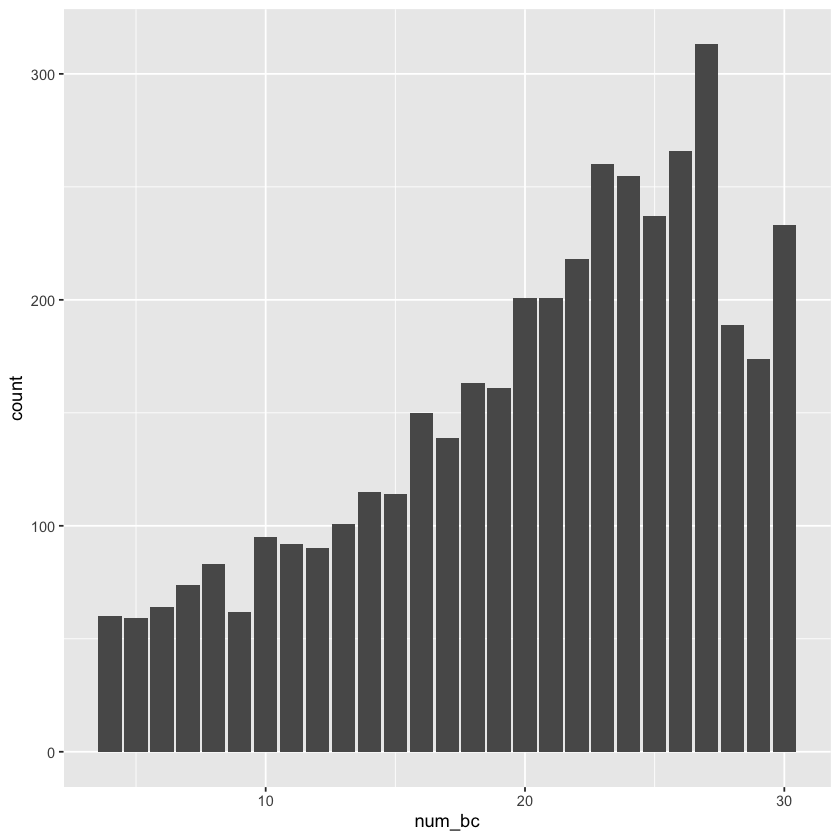

In [35]:
summary(rna_df_up_filt$num_bc)
ggplot(rna_df_up_filt,aes(x=num_bc))+geom_bar()

In [36]:
# # METHOD 1 dna normalized fold change
# res$normalt = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(dnaCount_new[,1:10]+1))
# res$normref = log2(rowSums(rnaCount_nobatch_new[,11:20]+1)/rowSums(dnaCount_new[,11:20]+1))
# res$logFC = log2(res$normalt/res$normref)

#METHOD 2: just log2 ref/alt in rna
# res$logFC = log2(rowSums(rnaCount_nobatch_new[,1:10]+1)/rowSums(rnaCount_nobatch_new[,11:20]+1))

# # trimming
# res$pval =  pmax(res$pval, 1e-6)
# res$logFC =  pmin(res$logFC, 10)
# res$logFC =  pmax(res$logFC, 1e-6)

In [37]:
dim(res)

[1] 2198    8

In [38]:
res = res%>%
    rownames_to_column()%>%
    filter(rowname %in% snp_names_up_filt)%>%
    mutate(neglog10_p = -log10(pval))%>%
    mutate(neglog10_p_x_logFC = neglog10_p*logFC)%>%
    arrange(desc(neglog10_p_x_logFC))%>%
    drop_na()


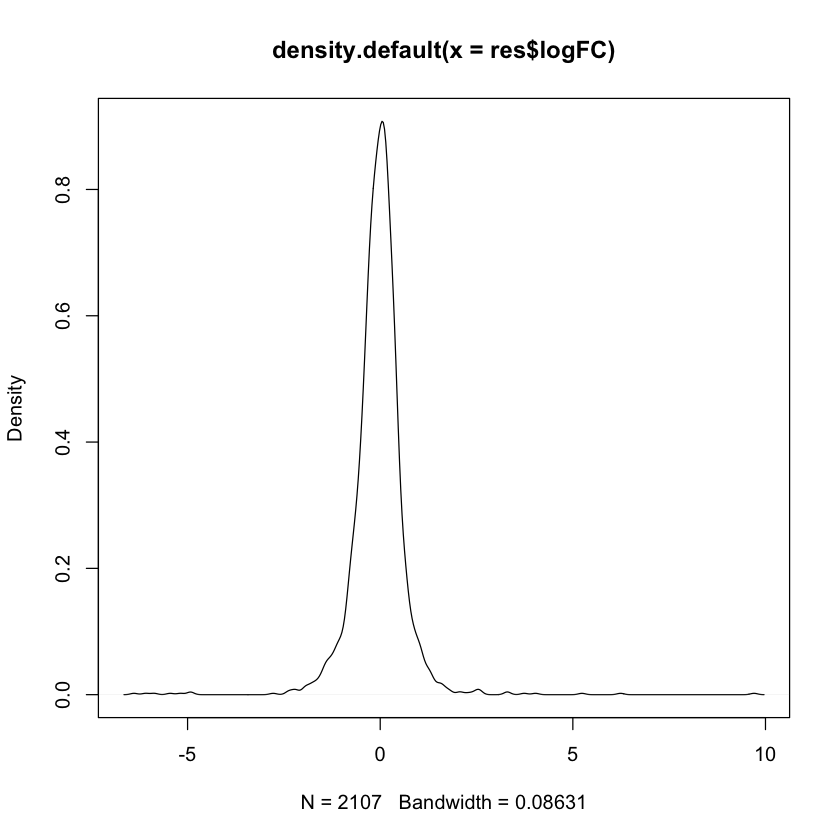

In [39]:
# When the hypothesis teseting is simple (two-condition comparison), a fold-change estimate is also available:

## plot log Fold-Change
par(bg='white')
plot(density(res$logFC))

pdf 
  2

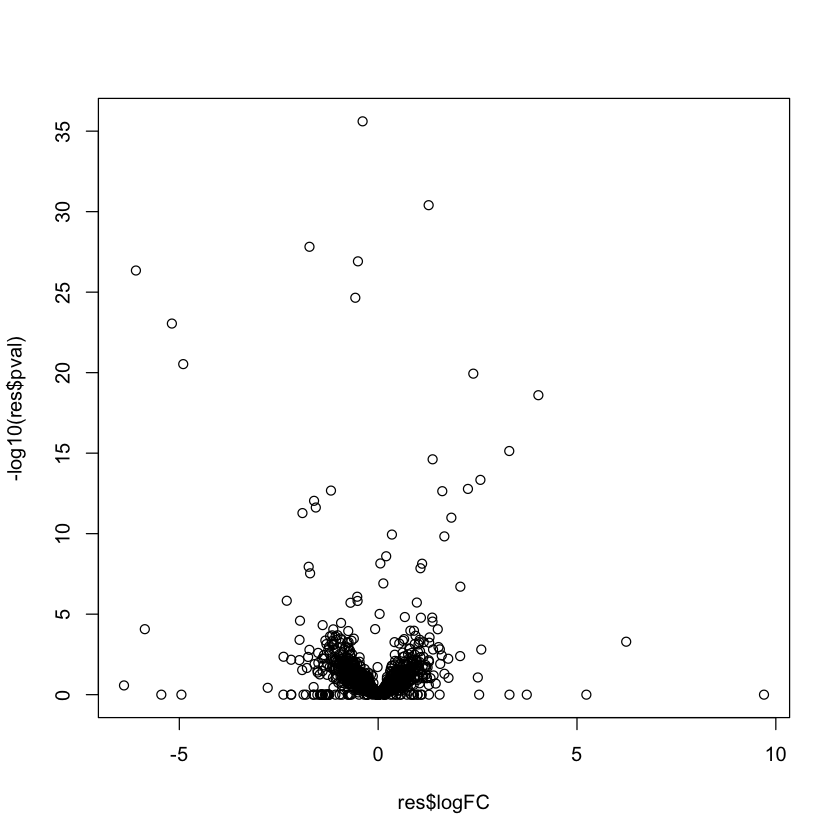

In [42]:
## plot volcano

par(bg='white')
plot(res$logFC, -log10(res$pval))

pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
plot(res$logFC, -log10(res$pval))

dev.off()

Warning message:
“Removed 2 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 2 rows containing missing values (geom_point).”


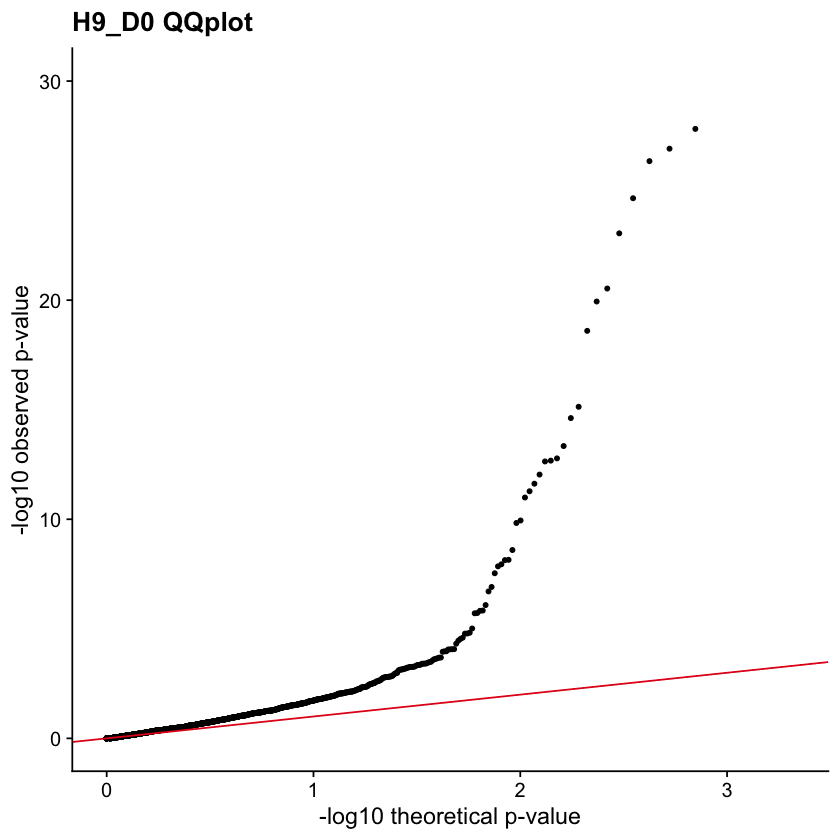

In [43]:
## plot qqplot

# pdf(paste0(save_prefix, 'volcano.pdf'))
par(bg='white')
qq_df = data.frame(emp_pval = sort(res$pval))

qq_df$theoretical_quantile = cume_dist(qq_df$emp_pval)

ggplot(qq_df, aes(x = -log10(theoretical_quantile), y = -log10(emp_pval)))+
    geom_point(size=1) +
    geom_abline(slope=1, intercept = 0, color = scales::brewer_pal(palette = "Set1")(1)[1]) +
  labs(x = "-log10 theoretical p-value", y = "-log10 observed p-value",
       title = paste0(tissue, " QQplot")) +  ylim(0, 30)+
  cowplot::theme_cowplot()
                                                        
ggsave(paste0(save_prefix, 'qqplot.pdf'))
# plot(1:length(-log10(res$pval)), -log10(res$pval))

# dev.off()

# annotate

In [44]:
lib_csv = '../../psych_lib_info.csv'
lib_df = read.csv(lib_csv)
lib_df = mutate(lib_df, name_abbr = str_c(Chr, Position, sep='_'))
head(lib_df)

,X.1,name,X,Linked_SNP,Chr,Position,Index_SNP,Disease,DHS_tissue,eGene,⋯,dbscSNV.ada_score,dbscSNV.rf_score,RawScore,PHRED,num_disease,disease_interest,pass_thres_low,pass_thres,CADD_score_bool,name_abbr
,<int>,<fct>,<int>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<fct>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<lgl>,<lgl>,<lgl>,<lgl>,<chr>
1,1,chr1.111243375.all_alt.G,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
2,2,chr1.111243375.Ref.C,75004,rs12085135,chr1,111243375,rs12061304,panic disorder,t-helper_17_cell,,⋯,NA,NA,-0.197208,0.728,1,TRUE,TRUE,FALSE,NA,chr1_111243375
3,3,chr1.113938499.all_alt.C,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
4,4,chr1.113938499.Ref.T,1977,rs74395031,chr1,113938499,rs115870915,"type 2 diabetes,Obsessive Compulsive Disorder",astrocyte_of_the_spinal_cord,NA,⋯,NA,NA,0.309426,7.336,1,TRUE,TRUE,TRUE,NA,chr1_113938499
5,5,chr1.11712109.all_alt.T,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109
6,6,chr1.11712109.Ref.C,569,rs2103665,chr1,11712109,rs115049252,schizo,spleen,NA,⋯,NA,NA,0.193843,5.751,1,FALSE,TRUE,TRUE,NA,chr1_11712109


In [49]:
thres = 0.05/dim(res)[1]
res_filt = res %>%
#     filter(pval < thres)
    filter(fdr<0.05)

dim(res)
dim(res_filt)

[1] 2107   11

[1] 105  11

Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”
Saving 7 x 7 in image

Warning message:
“Removed 10 rows containing missing values (geom_point).”
Warning message:
“Removed 6 rows containing missing values (geom_point).”


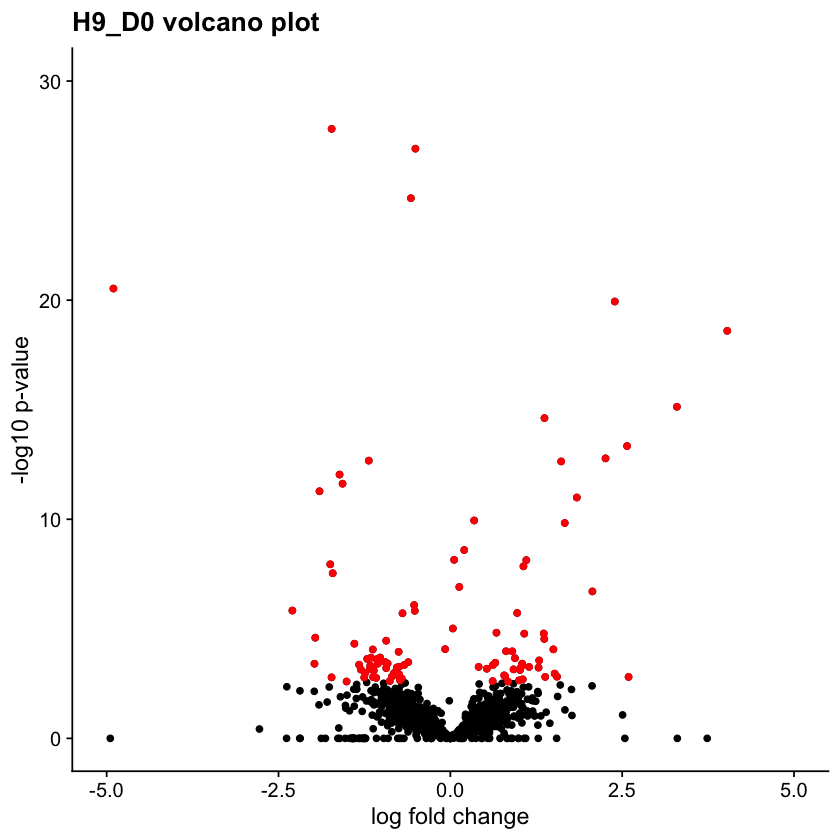

In [52]:
## plot volcano
# pdf(paste0(save_prefix, 'volcano.pdf'))
# par(bg='white')

ggplot(res, aes(x=logFC, y = -log10(pval))) + geom_point()+
 geom_point(data=res_filt, color='red')+
  labs(x = "log fold change", y = "-log10 p-value",
       title = paste0(tissue, " volcano plot")) + xlim(-5, 5)+ ylim(0,30)+
  cowplot::theme_cowplot()
# plot(res$logFC, -log10(res$pval),title(paste0(tissue, 'Volcano Plot')))
ggsave(paste0(save_prefix, 'volcano.pdf'))

# dev.off()

In [46]:
res_filt = res_filt %>%
    left_join(lib_df, by=c('rowname'='name_abbr'))

In [47]:
write.csv(res,paste0(save_prefix, 'comp.csv'))
write.csv(res_filt,paste0(save_prefix, 'comp_filt.csv'))


In [48]:
sort(unique(res_filt$GeneName))

[1] AF121897.4         ALMS1              ARHGAP9            BTN2A3P           
 [5] CADM3              CAMTA1             CCAR2              CLCN6             
 [9] CORO7-PAM16        CTD-2035E11.5      CTD-3035D6.2       CYP17A1-AS1       
[13] DGCR6              DNAJA3             ENOX1              ERRFI1            
[17] ESR2               FABP6              FGFR1              HIST1H2AJ         
[21] HIST1H2AK          HIST1H2BL          HLA-B              INSL4             
[25] INTS7              MAP3K1             MFAP3L             MIR182            
[29] MMP16              MTHFR              NFATC3             NSRP1             
[33] PARK7              PEMT               PLAA               PPT2              
[37] PTGIS              PTK2B              RER1               RERE              
[41] RP11-276M12.1      RP11-313I2.13      RP11-325K19.1      RP11-56N19.5      
[45] RP11-595B24.1      RP11-862P13.1      RP11-895M11.2      RP11-99J16__A.2   
[49] RP4-555D20.3       RP5-1115A15.1      RP5-850O15.3       RPL35AP4          
[53] SLC17A3            SMEK1              SMOX               STOML1            
[57] SZT2               UBE2D3             XXbac-BPG248L24.12 Z83851.3          
[61] ZKSCAN4           
641 Levels: ABCG1 AC002465.2 AC002480.2 AC002480.4 AC005076.5 ... ZSCAN31